Polynomial degree: 0
Error: 0.08433288984649781
Bias^2: 0.0840477119811657
Var: 0.00028517786533210947
0.08433288984649781 >= 0.0840477119811657 + 0.00028517786533210947 = 0.08433288984649781
Polynomial degree: 1
Error: 0.0357189320981738
Bias^2: 0.035358566508640575
Var: 0.00036036558953322684
0.0357189320981738 >= 0.035358566508640575 + 0.00036036558953322684 = 0.035718932098173804
Polynomial degree: 2
Error: 0.024075939739960743
Bias^2: 0.02352071400056772
Var: 0.0005552257393930248
0.024075939739960743 >= 0.02352071400056772 + 0.0005552257393930248 = 0.024075939739960747
Polynomial degree: 3
Error: 0.01582227191214812
Bias^2: 0.015253463032518533
Var: 0.0005688088796295882
0.01582227191214812 >= 0.015253463032518533 + 0.0005688088796295882 = 0.01582227191214812
Polynomial degree: 4
Error: 0.02060921659896589
Bias^2: 0.019845228954472556
Var: 0.0007639876444933303
0.02060921659896589 >= 0.019845228954472556 + 0.0007639876444933303 = 0.020609216598965887
Polynomial degree: 5
Error: 0

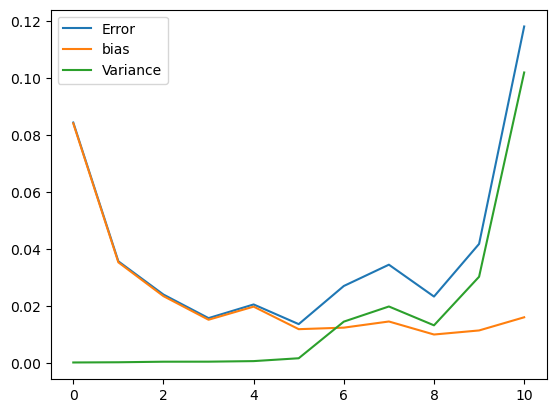

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 20
n_boostraps = 200
maxdegree = 11


def FrankeFunction(x,y):
    '''Calculates the two-dimensional Franke's function.'''
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4



# Set up dataset

x = np.linspace(0, 1, n)#np.sort(np.random.rand(n, 1), axis = 0)
y = np.linspace(0, 1, n) #np.sort(np.random.rand(n, 1), axis = 0)

x_, y_ = np.meshgrid(x, y)
x_, y_ = np.ravel(x_), np.ravel(y_) #flater ut matrisen, deler opp i to vektorer

# xy = np.stack((np.ravel(x_),np.ravel(y_)), axis = -1) 
z = FrankeFunction(x_,y_) + np.random.normal(0, 0.1, x_.shape)


error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)


for degree in range(maxdegree):
    # X = PolynomialFeatures(degree, include_bias = True).fit_transform(xy) #make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(np.c_[x_, y_])
    x_train, x_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
 

    z_pred = np.empty((z_test.shape[0], n_boostraps))
    mse = np.zeros(n_boostraps)

    for i in range(n_boostraps):
        # print(f'The shape of z_test {np.shape(z_test)}')
        # print(f'The shape of z_pred {np.shape(z_pred)}')
        x_resample, z_resample = resample(x_train, z_train)
        linreg = LinearRegression()
        model = linreg.fit(x_resample, z_resample)
        z_pred[:, i] = model.predict(x_test).ravel()

        mse[i] = np.mean((z_test - z_pred[:,i])**2)
        

    polydegree[degree] = degree
    error[degree] = np.mean(mse)
    bias[degree] = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=False))**2 ) # NEEDS to be false due to shape of z_test to make operations mathematically sensible
    variance[degree] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

    
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='Bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()